In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Leagues = ['Premier_League','Bundesliga','La_Liga','Ligue-1','Serie-A']

In [3]:
for league in Leagues:
    print(league)
    df = pd.read_csv(f"Competive_Index_{league}")
    del df['Unnamed: 0']
    df['League'] = league
    print(df.columns)
    if league == 'Premier_League':
        Leagues_combined = pd.DataFrame(columns=df.columns)
    Leagues_combined = pd.concat([Leagues_combined,df])

Premier_League
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Bundesliga
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
La_Liga
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Ligue-1
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Serie-A
Index(['Seasons', 'Champions', 'Competitive_Index', 'Competitive_Index_trend',
       'League'],
      dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_15264\412737358.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Leagues_combined = pd.concat([Leagues_combined,df])


In [4]:
Leagues_combined = Leagues_combined[Leagues_combined.columns[:-1]]

In [5]:
Leagues_combined

,Seasons,Champions,Competitive_Index,League
0,1992-1993,Manchester Utd,0.568840,Premier_League
1,1993-1994,Manchester Utd,0.523455,Premier_League
2,1994-1995,Blackburn,0.495969,Premier_League
3,1995-1996,Manchester Utd,0.613454,Premier_League
4,1996-1997,Manchester Utd,0.722202,Premier_League
...,...,...,...,...
24,2019-2020,Juventus,0.496319,Serie-A
25,2020-2021,Inter,0.421575,Serie-A
26,2021-2022,Milan,0.543119,Serie-A
27,2022-2023,Napoli,0.572463,Serie-A


In [7]:
def MinMax_Scaling(feature):
    feat = np.array(feature)
    min_,max_ = np.min(feat),np.max(feat)
    scaling = (feat- min_)/(max_- min_)
    return scaling

In [8]:
Leagues_combined_scaled =  Leagues_combined.copy()
Leagues_combined_scaled['Competitive_Index'] =  MinMax_Scaling(Leagues_combined['Competitive_Index'])

In [9]:
Leagues_combined_scaled

,Seasons,Champions,Competitive_Index,League
0,1992-1993,Manchester Utd,0.648640,Premier_League
1,1993-1994,Manchester Utd,0.583400,Premier_League
2,1994-1995,Blackburn,0.543891,Premier_League
3,1995-1996,Manchester Utd,0.712769,Premier_League
4,1996-1997,Manchester Utd,0.869091,Premier_League
...,...,...,...,...
24,2019-2020,Juventus,0.544394,Serie-A
25,2020-2021,Inter,0.436952,Serie-A
26,2021-2022,Milan,0.611667,Serie-A
27,2022-2023,Napoli,0.653847,Serie-A


In [10]:
Leagues_combined_scaled = Leagues_combined_scaled[Leagues_combined_scaled['Seasons'] > '2000-2001']

In [11]:
Leagues_combined_scaled

,Seasons,Champions,Competitive_Index,League
9,2001-2002,Arsenal,0.585182,Premier_League
10,2002-2003,Manchester Utd,0.417001,Premier_League
11,2003-2004,Arsenal,0.455566,Premier_League
12,2004-2005,Chelsea,0.495335,Premier_League
13,2005-2006,Chelsea,0.385645,Premier_League
...,...,...,...,...
24,2019-2020,Juventus,0.544394,Serie-A
25,2020-2021,Inter,0.436952,Serie-A
26,2021-2022,Milan,0.611667,Serie-A
27,2022-2023,Napoli,0.653847,Serie-A


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '2001-2002'),
  Text(1, 0, '2002-2003'),
  Text(2, 0, '2003-2004'),
  Text(3, 0, '2004-2005'),
  Text(4, 0, '2005-2006'),
  Text(5, 0, '2006-2007'),
  Text(6, 0, '2007-2008'),
  Text(7, 0, '2008-2009'),
  Text(8, 0, '2009-2010'),
  Text(9, 0, '2010-2011'),
  Text(10, 0, '2011-2012'),
  Text(11, 0, '2012-2013'),
  Text(12, 0, '2013-2014'),
  Text(13, 0, '2014-2015'),
  Text(14, 0, '2015-2016'),
  Text(15, 0, '2016-2017'),
  Text(16, 0, '2017-2018'),
  Text(17, 0, '2018-2019'),
  Text(18, 0, '2019-2020'),
  Text(19, 0, '2020-2021'),
  Text(20, 0, '2021-2022'),
  Text(21, 0, '2022-2023'),
  Text(22, 0, '2023-2024')])

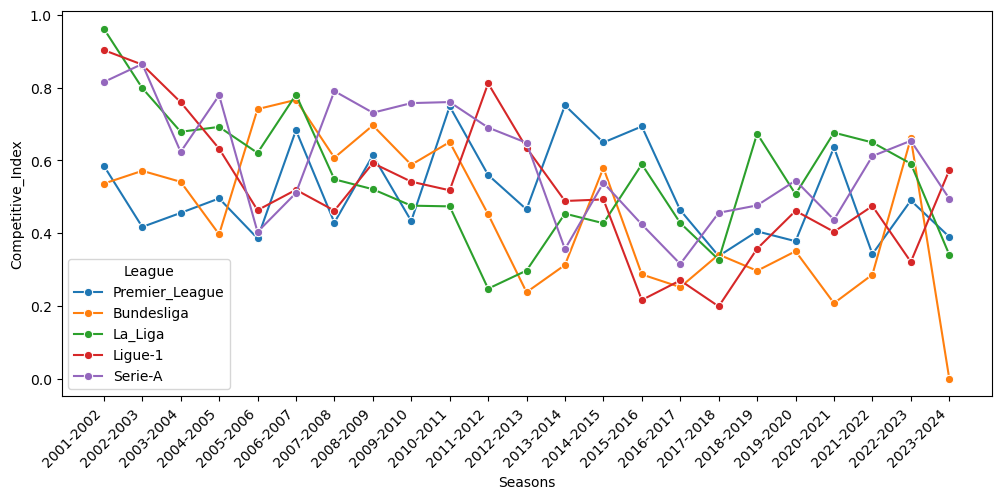

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(data=Leagues_combined_scaled,x='Seasons',y='Competitive_Index', hue='League' ,marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')

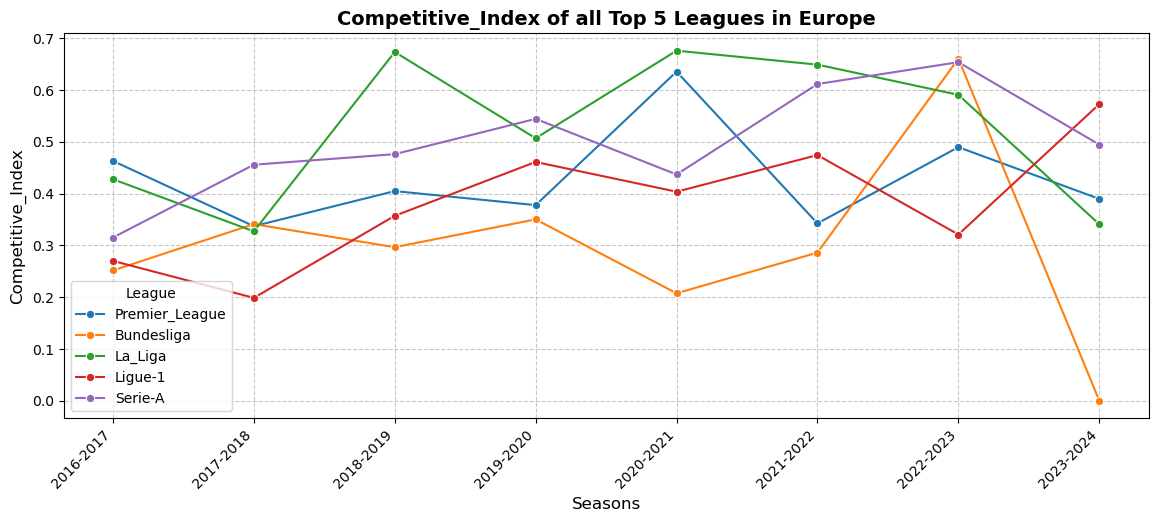

In [80]:
# Set figure size
plt.figure(figsize=(14, 5))


# Create line plot with markers and styling
sns.lineplot(data=Leagues_combined_scaled, x='Seasons', y='Competitive_Index', hue='League' ,marker='o', linestyle='-')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
# plt.xticks(range(len(Leagues_combined_scaled['Seasons'])), Leagues_combined_scaled['Seasons']) 

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Competitive_Index', fontsize=12)
plt.title('Competitive_Index of all Top 5 Leagues in Europe', fontsize=14, fontweight='bold')

# Adjust layout
# plt.tight_layout()
plt.show()